# Completely optional
... but fun! 
#### Geek-out about Pandas Expanding Rolling Windows follows (a.k.a. `"Let's measure the Earth!!"`)

Rolling windows are cool, especially because they forget the far past, and keep only the recent data "in mind" when performing operations. There are [many types of rolling window](https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions), which will fall out of the scope of the Academy. 

I do however want to mention the expanding rolling window, as it is crazy cool! _(Confession bear: This is not technically timeseries, but just about the rolling windows of Pandas.)_

![Al Biruni](https://www.thefamouspeople.com/profiles/images/ab-rayn-al-brn-1.jpg)

Let's say you are [Al-Biruni, and you are trying to calculate the radius of the earth in the 9th century](https://www.quora.com/When-and-how-did-scientists-measure-the-radius-of-the-earth). (for argument's sake). 

You take measurements using his rudimentary yet brilliant approach, but your instrument is not that precise. 

Our objective is to only be wrong by 10 Km (at the most!)

Let's go measure the earth! 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 

np.random.seed(1000)
%matplotlib inline 

In [2]:
our_precision = .03

In [3]:
first_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6217.24 Km, which is wrong by -153.76 Km


Uff... ok, let's try again

In [4]:
second_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6432.34 Km, which is wrong by 61.34 Km


Ok, maybe third time is the charm... 

In [5]:
third_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6366.13 Km, which is wrong by -4.87 Km


Oh boy... well we know we can average stuff out... maybe that will help? 

In [6]:
mean_measure = np.mean([first_try, second_try, third_try])
utils.measure_error(mean_measure, corect_measure=6371)

We measured 6338.57 Km, which is wrong by -32.43 Km


So... how many do we need to get to our 10 Km mark? 

This is where expanding rolling windows come into play: when you are measuring something which you know is a constant, and yet you have a sequence of measures. 

In this case, your first measure is in no way inferior to your most recent measure, all of them are equally useful. 

In [7]:
measurements = pd.Series([utils.measure_the_earth(our_precision) for i in range(1000)])

Let's use an expanding window to see how our mean evolves with the number of experiments: 

In [8]:
series_of_measurements = measurements.expanding().mean()

The number we are looking for is 6371 Km. 

In [9]:
series_of_measurements.head()

0    6494.149613
1    6403.829173
2    6417.699539
3    6400.891031
4    6376.564992
dtype: float64

And as a plot: 

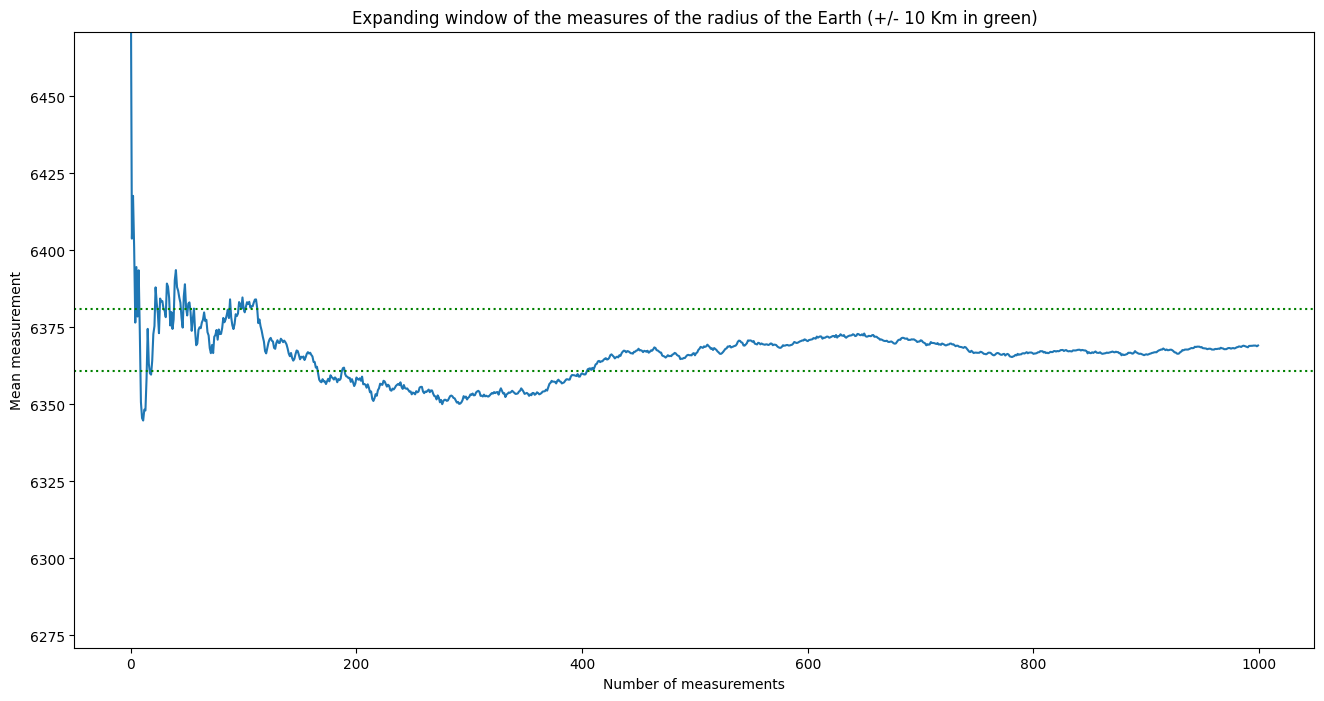

In [10]:
utils.plot_number_of_tries(series_of_measurements)

So as a summary, expanding rolling windows are super-useful when we are measuring something we know to be a constant, and we have a sequence of measures. So... cool! 